# Using online social media audience data to analyse the drivers of low-carbon diets


The code behind Figure 1 and 2 in Eker et al. [Using online social media audience data to analyse the drivers of low-carbon diets](https://doi.org/10.1088/1748-9326/abf770).

- Removing the coutnries with low Facebook penetration rates from the dataset
- Visualizing the interest in vegetarianism across the world


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import math
import geopandas as gpd

In [2]:
directory = "./data/"

**January** data

In [124]:
df = pd.read_excel(directory+"AllData_Aggregate.xlsx")
df.set_index('Unnamed: 0', inplace=True)
df.head()

,Population,GDP,MYS,Meat_2017,Meat_2016,Meat_2015,Meat_2014,D_meat_2017,D_meat_2016,D_meat_2015,FB_jan_total,FB_jan_veg,FB_jan_sus,Veg_survey,Survey year,GT_veg,FB_penetration,FB_veg_fraction,FB_sus_fraction
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Aruba,105845.0,NaN,8.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Afghanistan,37172386.0,520.896603,3.30,8.59,9.05,9.98,10.62,-5.082873,-9.318637,-6.026365,3400000.0,40000.0,7700.0,NaN,NaN,0.0,0.091466,0.011765,0.002265
Angola,30809762.0,3432.385736,3.02,23.49,21.55,25.84,30.04,9.002320,-16.602167,-13.981358,2000000.0,30000.0,1000.0,NaN,NaN,0.0,0.064914,0.015000,0.000500
Albania,2866376.0,5268.848504,10.06,47.51,41.44,41.72,51.33,14.647683,-0.671141,-18.721995,1200000.0,87000.0,3800.0,NaN,NaN,0.0,0.418647,0.072500,0.003167
Andorra,77006.0,42029.762737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [152]:
# Population only for 15+
pop = pd.read_excel(directory+'wcde_data_populationAged.xlsx')
cntpop = list(set(pop.index))
for cnt in df.index:
    df.loc[cnt, 'Pop15'] = pop[pop.Country == cnt]['Population'].sum() * 1000

In [153]:
# correct for russia
cols = ['Pop15', 'GDP','MYS','Meat_2017','Meat_2016','Meat_2015','Meat_2014','D_meat_2017','D_meat_2016','D_meat_2015']
df.loc['Russia', cols] = df.loc['Russian Federation', cols]

df.loc['Russia', 'FB_penetration'] = df.loc['Russia', 'FB_jan_total'] / df.loc['Russia', 'Population']
df['penetration15'] = df['FB_jan_total'] / df['Pop15']

In [222]:
fb_penetration = df[~df['penetration15'].isna()][['penetration15', 'FB_jan_total', 'Pop15', 'FB_veg_fraction', 'FB_sus_fraction']]
fb_penetration = fb_penetration.sort_values(axis=0, by='penetration15', ascending=False)

In [223]:
fb_penetration.shape

(131, 5)

In [144]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
fb_countries = list(set(df.index))
map_countries = list(world.name)
fb_included = list(set(df[df.index.isin(world.name)].index))
fb_notincluded = [c for c in fb_countries if c not in fb_included]
fb_notincluded

['United States Virgin Islands',
 'Niue',
 'St. Vincent and the Grenadines',
 'The former Yugoslav Republic of Macedonia',
 'Korea, Rep.',
 'Saint Lucia',
 'Mayotte',
 'Congo, Rep.',
 'Arab World',
 'São Tomé & Príncipe',
 'IDA blend',
 'Not classified',
 'Swaziland',
 'Congo - Brazzaville',
 'Kyrgyz Republic',
 'South Sudan',
 'North America',
 'Micronesia',
 'Cape Verde',
 'East Asia & Pacific (IDA & IBRD countries)',
 'West Bank and Gaza',
 'Venezuela (Bolivarian Republic of)',
 'Tokelau',
 'OECD members',
 'Hong Kong',
 'Heavily indebted poor countries (HIPC)',
 'Tuvalu',
 'British Virgin Islands',
 'Bouvet Island',
 'Malta',
 'Monaco',
 'San Marino',
 'Latin America & Caribbean (excluding high income)',
 'South Asia',
 'Western Sahara',
 "Cote d'Ivoire",
 'Middle income',
 'IBRD only',
 'China, mainland',
 'Anguilla',
 'China, Hong Kong SAR',
 'Norfolk Island',
 'Brunei Darussalam',
 'Caribbean Netherlands',
 'Nauru',
 'Martinique',
 'Barbados',
 'Wallis & Futuna',
 'Middle East &

In [163]:
world.loc[world.name == 'Czechia', 'name'] = 'Czech Republic'
world.loc[world.name == 'United States of America','name'] = 'United States'

#world.loc[world.name == 'Russia','name'] = 'Russian Federation'

In [164]:
for index, row in world.iterrows():
    cnt = row['name']
    try:
        world.loc[index, 'penetration'] = 100 * fb_penetration.loc[cnt, 'penetration15']
        #world.loc[index, 'veg_corr'] = 100 * fb_penetration.loc[cnt, 'veg_corr']
        #world.loc[index, 'sus_corr'] = 100 * fb_penetration.loc[cnt, 'sus_corr']
    except:
        world.loc[index, 'penetration'] = 'NA'
        #world.loc[index, 'veg_corr'] = 'NA'
        #world.loc[index, 'sus_corr'] = 'NA'
    

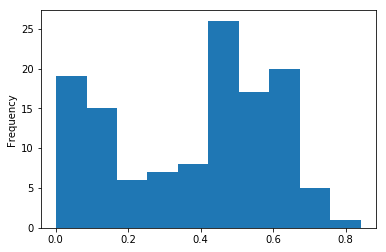

In [128]:
fb_penetration['FB_penetration'].plot(kind='hist')

In [79]:
world[world.name=='United States']['penetration']

4    0.580742
Name: penetration, dtype: object

In [80]:
world[world.name=='China']['penetration']

139    0.00122062
Name: penetration, dtype: object

In [61]:
def geopandas_colorbar_same_height(f, ax, vmin, vmax, cmap):
    from matplotlib.colors import Normalize
    from matplotlib import cm
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)

    norm = Normalize(vmin=vmin, vmax=vmax)
    n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
    n_cmap.set_array([])

    cbar = f.colorbar(n_cmap, cax=cax)
    cbar.ax.tick_params(labelsize=13) 

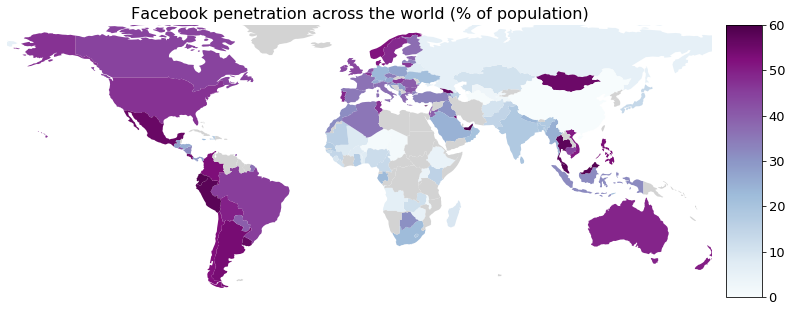

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
ax.set_xlim([-175, 175])
ax.set_ylim([-60,75])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])


world[world['penetration']!='NA'].plot(ax=ax, column='penetration', cmap='BuPu')
world[world['penetration']=='NA'].plot(ax=ax, color='lightgrey')
geopandas_colorbar_same_height(fig, ax, 0, 60, 'BuPu')
ax.set_axis_off()

ax.set_title("Facebook penetration across the world (% of population)", fontsize=16)
plt.savefig(directory+"World_penetration_Jan.png", dpi=300, bbox_inches='tight')

plt.show()

## Which countries to exclude?

- get the june data for disaggregate education/gender etc.
- get median age of each of these countries, also IQR
- get the median 
- remove the countries where FB penetration rates are below the 25th quantile and the audience sizes are also below the 25th quantile

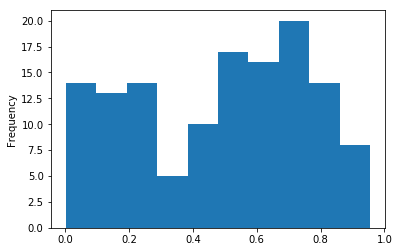

In [166]:
fb_penetration['penetration15'].plot(kind='hist')

In [225]:
print(fb_penetration['penetration15'].quantile([0.25, 0.5, 0.75]))
fb_penetration[fb_penetration['penetration15']<fb_penetration['penetration15'].quantile(.25)]

0.25    0.238576
0.50    0.545351
0.75    0.701305
Name: penetration15, dtype: float64


,penetration15,FB_jan_total,Pop15,FB_veg_fraction,FB_sus_fraction
Unnamed: 0,,,,,
Guinea,0.237209,1900000.0,8.009800e+06,0.006842,0.000789
Cameroon,0.225738,3400000.0,1.506170e+07,0.005882,0.000294
Guinea-Bissau,0.214906,250000.0,1.163300e+06,0.004000,0.004000
Azerbaijan,0.207895,1600000.0,7.696200e+06,0.075000,0.000812
Nigeria,0.205560,24000000.0,1.167540e+08,0.012917,0.004583
Zambia,0.199533,2100000.0,1.052460e+07,0.032381,0.002048
Liberia,0.171606,520000.0,3.030200e+06,0.016731,0.001923
Japan,0.163193,18000000.0,1.102991e+08,0.027222,0.001944
Afghanistan,0.151972,3400000.0,2.237250e+07,0.011765,0.002265


In [226]:
fb_penetration[fb_penetration['penetration15']<fb_penetration['penetration15'].quantile(.25)].shape

(33, 5)

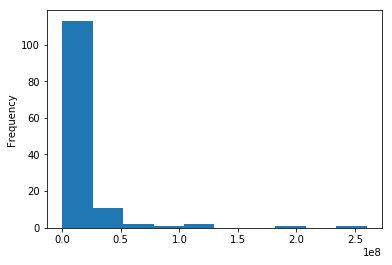

In [172]:
fb_penetration['FB_jan_total'].plot(kind='hist')

In [285]:
fb_penetration['FB_jan_total'].quantile([0.25, 0.5, 0.75])

0.25     1600000.0
0.50     3500000.0
0.75    13000000.0
Name: FB_jan_total, dtype: float64

In [212]:
# to drop
dfd = fb_penetration[fb_penetration['penetration15']<fb_penetration['penetration15'].quantile(.25)]
to_drop = dfd[dfd['FB_jan_total']<fb_penetration['FB_jan_total'].quantile(.25)]


In [214]:
to_drop

,penetration15,FB_jan_total,Pop15,FB_jan_veg,FB_jan_sus,keep
Unnamed: 0,,,,,,
Guinea-Bissau,0.214906,250000.0,1163300.0,1000.0,1000.0,0.0
Liberia,0.171606,520000.0,3030200.0,8700.0,1000.0,0.0
Sierra Leone,0.144587,690000.0,4772200.0,8200.0,1800.0,0.0
Kyrgyzstan,0.144583,620000.0,4288200.0,58000.0,1000.0,0.0
Benin,0.132099,930000.0,7040200.0,6800.0,1000.0,0.0
Togo,0.118448,590000.0,4981100.0,3200.0,1000.0,0.0
Belarus,0.091289,710000.0,7777500.0,80000.0,1000.0,0.0
Zimbabwe,0.080763,850000.0,10524600.0,17000.0,1800.0,0.0
Rwanda,0.061301,490000.0,7993300.0,5100.0,1000.0,0.0


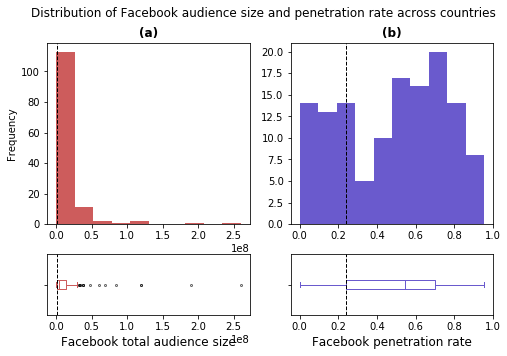

In [284]:
fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1]})

fig.set_size_inches(8,5)
plt.subplots_adjust(hspace=.25)

q_tot = fb_penetration['FB_jan_total'].quantile(.25)
q_pen = fb_penetration['penetration15'].quantile(.25)

axes[0, 0] = fb_penetration['FB_jan_total'].plot(kind='hist', ax=axes[0,0], color='indianred')
axes[0, 1] = fb_penetration['penetration15'].plot(kind='hist', ax=axes[0,1], color='slateblue')

flier = {'flierprops' : dict(marker='o', markerfacecolor='green', markersize=5,
                                                linestyle='none', alpha = .6)}
axes[1,0] = fb_penetration['FB_jan_total'].plot(kind='box', ax=axes[1,0], vert=False, 
                                                color='indianred', fontsize=10,
                                               flierprops = dict(marker='o', color='indianred', markersize=2,
                                                linestyle='none', alpha = .6))
axes[1,1] = fb_penetration['penetration15'].plot(kind='box', ax=axes[1,1], vert=False, color='slateblue',)



axes[0,0].axvline(x=q_tot, c='black', lw=1, linestyle='--')
axes[0,1].axvline(x=q_pen, c='black', lw=1, linestyle='--')
axes[1,0].axvline(x=q_tot, c='black', lw=1, linestyle='--')
axes[1,1].axvline(x=q_pen, c='black', lw=1, linestyle='--')

axes[0, 1].set_ylabel('')
axes[1, 0].set_yticklabels([])
axes[1, 1].set_yticklabels([])

axes[0,0].set_title("(a)", fontweight='bold')
axes[0,1].set_title("(b)", fontweight='bold')

axes[1, 0].set_xlabel("Facebook total audience size", fontsize=12)
axes[1, 1].set_xlabel("Facebook penetration rate", fontsize=12)
plt.suptitle("Distribution of Facebook audience size and penetration rate across countries")
plt.savefig(directory+'omittedcountries_hist.png', bbox_inches='tight')
plt.show()

In [228]:
for index, row in fb_penetration.iterrows():
    if index in to_drop.index:
        fb_penetration.loc[index, 'keep'] = 0
    else:
        fb_penetration.loc[index, 'keep'] = 1



In [229]:
fb_penetration.to_excel(directory+'penetration_Feb21.xlsx')

In [230]:
to_drop.to_excel(directory+"to_drop.xlsx")


In [220]:
fb_penetration[fb_penetration['keep']==1].shape

(115, 6)

In [232]:
fb_penetration[fb_penetration['keep']==1].to_excel(directory+'to_keep.xlsx')

In [245]:
to_keep = fb_penetration[fb_penetration['keep']==1]

In [248]:
to_keep.shape

(115, 6)

# New maps with omitted countries

In [234]:
for index, row in world.iterrows():
    cnt = row['name']
    try:
        if fb_penetration.loc[cnt, 'keep'] == 1:
            world.loc[index, 'veg_per'] = 100 * fb_penetration.loc[cnt, 'FB_veg_fraction']
            world.loc[index, 'sus_per'] = 100 * fb_penetration.loc[cnt, 'FB_sus_fraction']
        else:
            world.loc[index, 'veg_per'] = 'drop'
            world.loc[index, 'sus_per'] = 'drop'
    except:
        world.loc[index, 'veg_per'] = 'NA'
        world.loc[index, 'sus_per'] = 'NA'

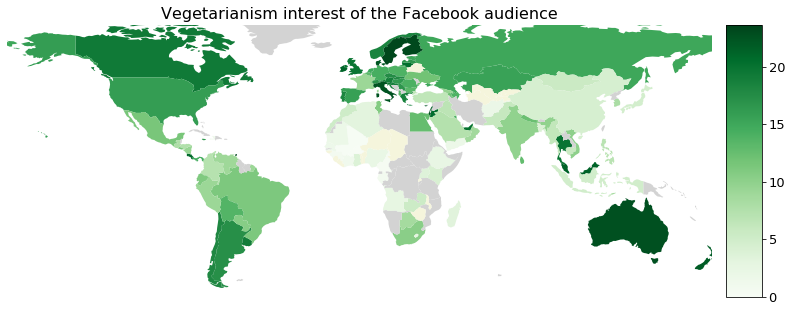

In [246]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
ax.set_xlim([-175, 175])
ax.set_ylim([-60,75])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])


world[(world['veg_per']!='NA')&(world['veg_per']!='drop')].plot(ax=ax, column='veg_per', cmap='Greens')
world[world['veg_per']=='NA'].plot(ax=ax, color='lightgrey')
world[world['veg_per']=='drop'].plot(ax=ax, color='beige')
geopandas_colorbar_same_height(fig, ax, 0, 100*to_keep['FB_veg_fraction'].max(), 'Greens')
ax.set_axis_off()

ax.set_title("Vegetarianism interest of the Facebook audience", fontsize=16)
plt.savefig(directory+"VegetarianismMap_JanData_revision.png", dpi=300, bbox_inches='tight')

plt.show()

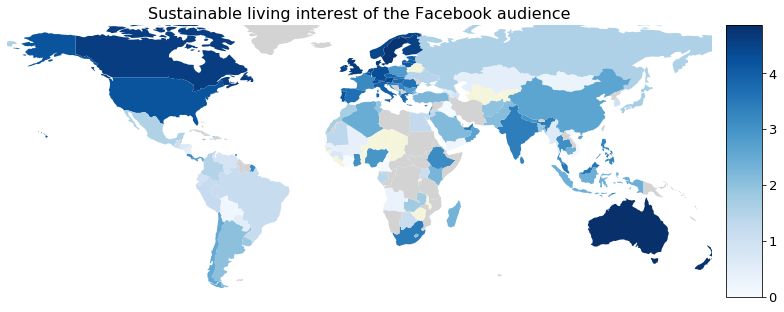

In [247]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
ax.set_xlim([-175, 175])
ax.set_ylim([-60,75])
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])


world[(world['sus_per']!='NA')&(world['sus_per']!='drop')].plot(ax=ax, column='sus_per', cmap='Blues')
world[world['sus_per']=='NA'].plot(ax=ax, color='lightgrey')
world[world['sus_per']=='drop'].plot(ax=ax, color='beige')
geopandas_colorbar_same_height(fig, ax, 0, 100*to_keep['FB_sus_fraction'].max(), 'Blues')
ax.set_axis_off()

ax.set_title("Sustainable living interest of the Facebook audience", fontsize=16)
plt.savefig(directory+"SusLivingMap_JanData_revision.png", dpi=300, bbox_inches='tight')

plt.show()

In [250]:
to_keep.sort_values(by='FB_sus_fraction', ascending=False, inplace=True)
to_keep.head(5)

C:\Users\sibel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,penetration15,FB_jan_total,Pop15,FB_veg_fraction,FB_sus_fraction,keep
Unnamed: 0,,,,,,
Australia,0.735954,15000000.0,20381700.0,0.166667,0.048667,1.0
New Zealand,0.776458,3000000.0,3863700.0,0.156667,0.046667,1.0
Sweden,0.727317,6000000.0,8249500.0,0.183333,0.043333,1.0
Denmark,0.766935,3700000.0,4824400.0,0.159459,0.035135,1.0
Cyprus,0.878507,880000.0,1001700.0,0.159091,0.032955,1.0


In [252]:
to_keep['FB_sus_fraction'].mean()

0.007394521658089743

In [253]:
to_keep.sort_values(by='FB_veg_fraction', ascending=False, inplace=True)
to_keep.head(5)

C:\Users\sibel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,penetration15,FB_jan_total,Pop15,FB_veg_fraction,FB_sus_fraction,keep
Unnamed: 0,,,,,,
Trinidad and Tobago,0.668275,720000.0,1077400.0,0.236111,0.008889,1.0
Singapore,0.740326,3700000.0,4997800.0,0.183784,0.027027,1.0
Sweden,0.727317,6000000.0,8249500.0,0.183333,0.043333,1.0
Finland,0.585226,2700000.0,4613600.0,0.181481,0.025926,1.0
Israel,0.735524,4700000.0,6390000.0,0.180851,0.004468,1.0


In [254]:
to_keep['FB_veg_fraction'].mean()

0.07554372040636337